In [4]:
import random

def dict_creator():
    """
    Creates a dictionary with keys from 1-100 and its values that are 1-100 and assigned randomly without repetition.
    This denotes the box number as keys and the number within the box as the value

    :return: dictionary of box number as its contained value
    """
    dict1 = {}
    values = list(range(1,101))
    random.shuffle(values)
    for i in range(1,101):
        dict1[i] = values[i-1]
        
    return dict1


def open_prisoner_boxes(input_file):
    """
    Open text file and read the contents as a dictionary.
    """
    with open(input_file, 'r') as f:
        boxes = f.read()
        boxes = boxes.splitlines()
        keys = [int(i.split(',')[0]) for i in boxes]
        values = [int(i.split(',')[1]) for i in boxes]
    
    # Adjoin two lists to form a dictionary using zip
    p_dict = dict(zip(keys, values))
    return p_dict


def follow_sequence(input_dict: dict, prisoner_number: int, show_trace:bool = False) -> int:
    """
    Follows the sequence until a loop occurs 
    """
    # Open the first box
    v = input_dict[prisoner_number]
    # Initialise sequence length
    sequence = 1
    # Initialise new variable
    v1 = 0
    # Store the first box number
    first_box = [v]
    # Loop until sequence is 50 or a loop occurs
    if v != prisoner_number:
        while sequence < 50:
            v1 = input_dict[v]
            if v1 == prisoner_number:
                first_box.append(v1)
                break
            else:
                v = v1
                first_box.append(v)
            sequence += 1
    if show_trace:
        print(first_box)
    return sequence

def calculate_success_rate(seq_list: list):
    """
    """
    # Return the sum of items less than 50 in the list
    return sum([1 for i in seq_list if i < 50])


Pseduocode

for all prisoners from 1....100:
   each prisoner opens their own box
   therefore, get the value of dict[i] -> v [i = prisoner #]
   initialise sequence as seq <- 1
   while sequence < 50:
     using v, go to dict[v] -> v_1
     if v_1 = i: break
     else:
     v = v_1
     sequence+= 1
   stop



In [5]:
random_assigned_boxes = dict_creator()
prisoner_boxes = open_prisoner_boxes('prisoners_40.txt')

In [6]:
sequences = [follow_sequence(input_dict=random_assigned_boxes, prisoner_number=prison) for prison in range(1, 101)]
# Caclulate success rate
successful_attempts = calculate_success_rate(sequences)
# Print it
print(successful_attempts)
# If all prisoners succeed, they are free. Otherwise boom shiva
condition = successful_attempts == 100
if condition:
    statement = 'The prisoners survived!'
else:
    statement = f'Oops, only {successful_attempts} successful attempts'
print(statement)

45
Oops, only 45 successful attempts


In [7]:
box_list_suffixes = [40,43,46,54,74,91,99,100]
text_files = ['prisoners_' + str(b) + '.txt' for b in box_list_suffixes]
for file in text_files:
    prisoner_boxes = open_prisoner_boxes(input_file=file)
    sequences = [follow_sequence(input_dict=random_assigned_boxes, prisoner_number=prison) for prison in range(1, 101)]
    # Caclulate success rate
    successful_attempts = calculate_success_rate(sequences)
    print(file)
    # Print it
    print(successful_attempts)
    # If all prisoners succeed, they are free. Otherwise boom shiva
    condition = successful_attempts == 100
    if condition:
        statement = 'The prisoners survived!'
    else:
        statement = f'Oops, only {successful_attempts} successful attempts'
    print(statement, end="\n")
    print(" ")

prisoners_40.txt
45
Oops, only 45 successful attempts
 
prisoners_43.txt
45
Oops, only 45 successful attempts
 
prisoners_46.txt
45
Oops, only 45 successful attempts
 
prisoners_54.txt
45
Oops, only 45 successful attempts
 
prisoners_74.txt
45
Oops, only 45 successful attempts
 
prisoners_91.txt
45
Oops, only 45 successful attempts
 
prisoners_99.txt
45
Oops, only 45 successful attempts
 
prisoners_100.txt
45
Oops, only 45 successful attempts
 


Probability of all prisoners succeeding: 0.3030


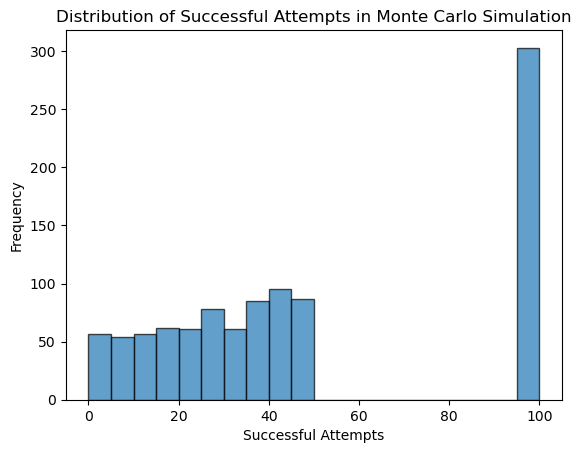

In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Set the seed
np.random.seed(42)

# Number of simulations
num_simulations = 1000

# Initialize a list to store the results of each simulation
results = []

# Run the Monte Carlo simulation
for _ in range(num_simulations):
    random_assigned_boxes = dict_creator()
    sequences = [follow_sequence(input_dict=random_assigned_boxes, prisoner_number=prison) for prison in range(1, 101)]
    successful_attempts = calculate_success_rate(sequences)
    results.append(successful_attempts)

# Calculate the success rate (probability of all prisoners succeeding)
success_probability = sum(1 for attempts in results if attempts == 100) / num_simulations

# Print the success probability
print(f"Probability of all prisoners succeeding: {success_probability:.4f}")

# Plot a histogram of the distribution of successful attempts
plt.hist(results, bins=range(0, 101, 5), edgecolor='black', alpha=0.7)
plt.xlabel('Successful Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Successful Attempts in Monte Carlo Simulation')
plt.show()